#### Задача 1. Wolfram

$x^{100}$ считалось полчаса и не посчиталось

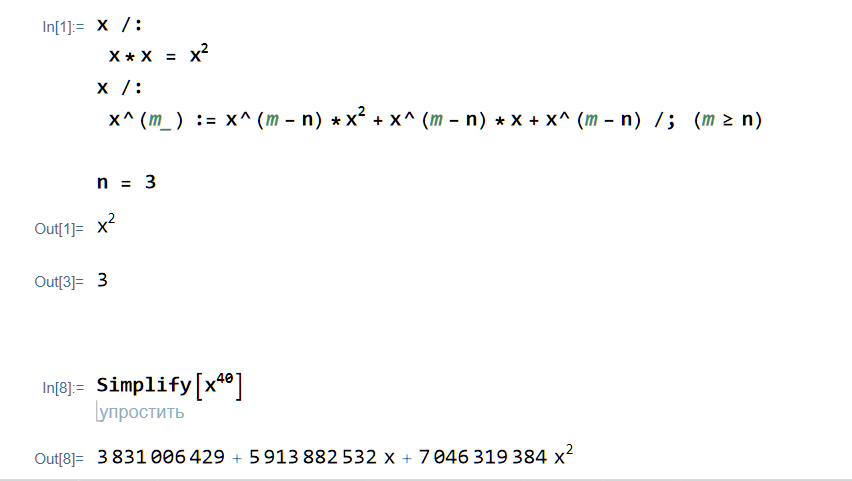

#### Задача 2. Квадратурная формула Гаусса

In [1]:
import numpy as np

def gauss_2(a, b):
    r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
    """
    # YOUR CODE HERE

    mid = (a + b) / 2
    x1 = mid - (mid - a) * 0.577350269
    x2 = mid + (mid - a) * 0.577350269
    w1 = w2 = 0.5

    return x1, x2, w1, w2

    raise NotImplementedError()

In [2]:
def integrate(f: function):
    a, b = 0, np.pi/4
    x1, x2, w1, w2 = gauss_2(a, b)
    return w1 * f(x1) * np.sin(2*x1) + w2 * f(x2) * np.sin(x2)

#### Задача 3. Интерполяция

In [3]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
    
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = len(self.xk)
        x_matrix  = np.broadcast_to(x, (n, n-1))
        xi_matrix = np.broadcast_to(np.reshape(self.xk, (-1, 1)), (n, n-1))
        xj_matrix = np.broadcast_to(np.asarray([self.xk[i] for i in range(0, n)]), (n, n))
        xj_matrix = np.reshape(xj_matrix[~np.eye(n, dtype=bool)], (n, n-1))
        
        li = np.prod((x_matrix - xj_matrix)/(xi_matrix-xj_matrix), axis=1)
        
        return np.dot(self.yk, li)

In [4]:
def func(x):
    return np.sqrt(x**3)

xk = np.array([4, 8, 9])
yk = func(xk)

In [10]:
interp = LagrangeInterpolator(xk, yk)

interp10 = interp(10)
interp10

31.65887450304571

In [11]:
print("error at x = 10: ", np.abs(interp(10) - func(10)))

error at x = 10:  0.036097901361916485


In [15]:
grid = np.linspace(4, 16, 1000)
m, curr = 0, 0

for i in grid:
    err = np.abs(interp(i) - func(i))
    
    if err > m:
        m = err
        curr = i

In [16]:
print("error on closed interval: ", m)
print("max error found on: ", curr)

error on closed interval:  1.6242430426399892
max error found on:  16.0


In [17]:
import matplotlib.pyplot as plt

In [18]:
a = []
for i in grid:
    a.append(interp(i))

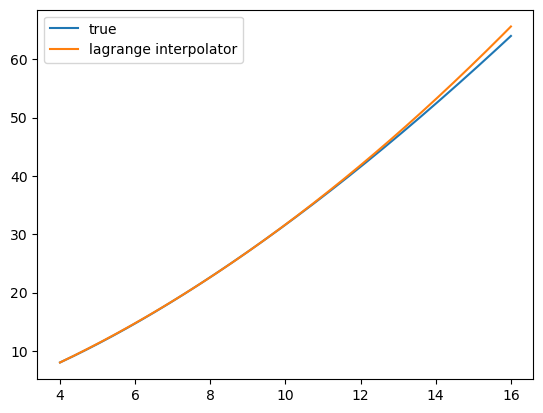

In [19]:
plt.plot(grid, func(grid), label='true')
plt.plot(grid, a, label='lagrange interpolator')

plt.legend()
plt.show()
